In [ ]:
import random
from animalai.environment import AnimalAIEnvironment
from wrappers import CustomUnityToGymWrapper

In [ ]:
aai_seed = 0
port = 5005 + random.randint(
    0, 1000
)  # uses a random port to avoid problems if a previous version exits slowly
env_path = "/Users/Ile-Maurice/Desktop/MacOS/MacOS"
configuration_file = "./animal_ai_environments/yroom.yaml"
watch = True

aai_env = AnimalAIEnvironment(
    file_name=env_path,  # Path to the environment
    seed=aai_seed,  # seed for the pseudo random generators
    arenas_configurations=configuration_file,
    play=False,  # note that this is set to False for training
    base_port=port,  # the port to use for communication between python and the Unity environment
    inference=watch,  # set to True if you want to watch the agent play
    useCamera=True,  # set to False if you don't want to use the camera (no visual observations)
    resolution=84,
    useRayCasts=False,  # set to True if you want to use raycasts
    no_graphics=False,  # set to True if you don't want to use the graphics ('headless' mode)
    timescale=1,
)

env = CustomUnityToGymWrapper(
    aai_env, uint8_visual=False, allow_multiple_obs=True, flatten_branched=True
)  # the wrapper for the environment

# # fix for error generated by the gym wrapper on line 241, python3.10/site-packages/mlagents_envs/rpc_utils.py in _observation_to_np_array
# # use img = img.reshape(obs.shape)

In [ ]:
print(env.action_space)
# 0 - nothing
# 1 - rotate right by 6 degrees
# 2 - rotate left by 6 degrees
# 3 - accelerate forward
# 4 - accelerate forward and rotate CW by 6 degrees
# 5 - accelerate forward and rotate CCW by 6 degrees
# 6 - accelerate backward
# 7 - accelerate backward and rotate CW by 6 degrees
# 8 - accelerate backward and rotate CCW by 6 degrees


print(env.observation_space) # see python3.10/site-packages/animalai/environment.py, line 202
# Box(84, 84, 3) - rgb image
# Box(-inf, inf, (7,)) - (health; v1, v2, v3; p1, p2, p3)

In [ ]:
env.reset()

In [ ]:
# for i in range(60):
#     obs, reward, done, info = env.step(1)
#     print("health:", obs[1][1])
#     print("vel:", obs[1][1:4]) # (v?, v?, v forward/backard relative to starting orientation)
#     print("pos:", obs[1][4:7]) # (p?, p?, p forward/backard relative to starting orientation)

# for i in range(30):
#     obs, reward, done, info = env.step(4)
#     obs, reward, done, info = env.step(7)
#     print("health:", obs[1][1])
#     print("vel:", obs[1][1:4])
#     print("pos:", obs[1][4:7])

obs, reward, done, info = env.step(3)
print("obs[0] shape", obs[0].shape)
print("obs[0][0] ", obs[0][0])
print("health:", obs[1][1])
print("vel:", obs[1][1:4])
print("pos:", obs[1][4:7])

In [ ]:
env.close()

In [5]:
import random
from animalai.environment import AnimalAIEnvironment
from wrappers import CustomUnityToGymWrapper
from animalai_agent import AnimalAIVectorhashAgent
from vectorhash import build_vectorhash_architecture
import random

### vhash
shapes = [(3,3,4), (4,4,5)]
model = build_vectorhash_architecture(shapes, N_h=1200, input_size=84*84, initalization_method="by_sparsity", shift="rat")




### animalai
aai_seed = 0
port = 5005 + random.randint(
    0, 1000
)  # uses a random port to avoid problems if a previous version exits slowly
env_path = "/Users/Ile-Maurice/Desktop/MacOS/MacOS"
configuration_file = "./animal_ai_environments/yroom.yaml"
watch = True

aai_env = AnimalAIEnvironment(
    file_name=env_path,  # Path to the environment
    seed=aai_seed,  # seed for the pseudo random generators
    arenas_configurations=configuration_file,
    play=False,  # note that this is set to False for training
    base_port=port,  # the port to use for communication between python and the Unity environment
    inference=False,  # set to True if you want to watch the agent play
    useCamera=True,  # set to False if you don't want to use the camera (no visual observations)
    resolution=84,
    useRayCasts=False,  # set to True if you want to use raycasts
    no_graphics=False,  # set to True if you don't want to use the graphics ('headless' mode)
    timescale=0.1,
)

env = CustomUnityToGymWrapper(
    aai_env, uint8_visual=False, allow_multiple_obs=True, flatten_branched=True
)  # the wrapper for the environment





#### agent
agent = AnimalAIVectorhashAgent(model, env)
agent.vectorhash.certainty = 0.75

by_sparsity
module shapes:  [(3, 3, 4), (4, 4, 5)]
N_g     :  116
N_patts :  2880
N_h     :  1200


I0000 00:00:1744047174.546615 7522515 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

In [6]:
from test_utils import generate_animalai_path

path = generate_animalai_path(100)

In [7]:
agent.test_path(path)

info for each h directly after learning it
h max, min, mean tensor(5.9966) tensor(-2.8519) tensor(1.7570)
h_from_s max, min, mean tensor(5.9957) tensor(-2.8514) tensor(1.7567)
h_from_s_denoised max, min, mean tensor(5.9965) tensor(-2.8517) tensor(1.7570)
avg nonzero/greaterzero h from book: tensor(1200) tensor(1106)
avg nonzero/greaterzero h from s: tensor(1200) tensor(1106)
avg nonzero/greaterzero h from s denoised: tensor(1200) tensor(1106)
mse/cosinesimilarity h from book and h from s tensor(1.1109e-07) tensor([1.0000])
mse/cosinesimilarity h from book and h from s denoised tensor(2.9816e-09) tensor([1.])
mse/cosinesimilarity s and s from h from s tensor(1.9700e-07) tensor([1.0000])
mse/cosinesimilarity s and s from h from s denoised tensor(1.9528e-07) tensor([1.0000])
mse/cosinesimilarity s and s from h tensor(1.9595e-07) tensor([1.0000])
[tensor([1., 0., 0.]), tensor([1., 0., 0., 0.])]
[tensor([1., 0., 0.]), tensor([1., 0., 0., 0.])]
[tensor([1., 0., 0., 0.]), tensor([1., 0., 0., 

([(tensor(-0.), tensor(-0.), tensor(-0.))],
 [4,
  1,
  6,
  2,
  7,
  2,
  3,
  5,
  5,
  6,
  7,
  3,
  0,
  4,
  3,
  0,
  2,
  1,
  1,
  5,
  8,
  0,
  3,
  4,
  4,
  2,
  4,
  6,
  8,
  7,
  8,
  4,
  1,
  2,
  2,
  6,
  5,
  2,
  6,
  6,
  7,
  7,
  4,
  4,
  1,
  1,
  5,
  5,
  3,
  4,
  1,
  4,
  6,
  1,
  6,
  3,
  6,
  1,
  4,
  7,
  5,
  0,
  6,
  7,
  2,
  1,
  4,
  4,
  7,
  5,
  5,
  4,
  0,
  8,
  8,
  7,
  1,
  3,
  6,
  6,
  6,
  6,
  1,
  3,
  1,
  6,
  4,
  5,
  7,
  6,
  4,
  6,
  8,
  4,
  2,
  7,
  6,
  5,
  5,
  4])

In [27]:
agent.vectorhash.scaffold.g

tensor([1.3453e-01, 6.7264e-02, 8.4080e-03, 3.8792e-12, 6.7264e-02, 3.3632e-02,
        4.2040e-03, 2.4092e-12, 8.4080e-03, 4.2040e-03, 5.2550e-04, 9.5729e-13,
        1.3542e-01, 6.7712e-02, 8.4640e-03, 3.9887e-12, 6.7712e-02, 3.3856e-02,
        4.2320e-03, 2.4469e-12, 8.4640e-03, 4.2320e-03, 5.2900e-04, 9.6233e-13,
        1.3965e-01, 6.9824e-02, 8.7280e-03, 3.8548e-12, 6.9824e-02, 3.4912e-02,
        4.3640e-03, 2.3837e-12, 8.7280e-03, 4.3640e-03, 5.4550e-04, 9.4369e-13,
        1.0188e-01, 5.0941e-02, 6.3682e-03, 4.8163e-07, 1.8348e-06, 5.0941e-02,
        2.5471e-02, 3.1842e-03, 1.7239e-06, 1.7649e-06, 6.3679e-03, 3.1843e-03,
        3.9960e-04, 1.5983e-06, 8.0988e-07, 2.4805e-07, 1.0016e-06, 1.2486e-06,
        7.3366e-07, 3.7102e-07, 1.2338e-01, 6.1692e-02, 7.7120e-03, 4.8573e-07,
        1.8610e-06, 6.1692e-02, 3.0846e-02, 3.8561e-03, 1.8097e-06, 1.8451e-06,
        7.7118e-03, 3.8562e-03, 4.8352e-04, 1.5976e-06, 8.4626e-07, 2.4055e-07,
        9.5004e-07, 1.1894e-06, 7.1437e-

In [26]:
import torch
agent.vectorhash.scaffold.shift([torch.tensor(0.5), torch.tensor(0), torch.tensor(0)])

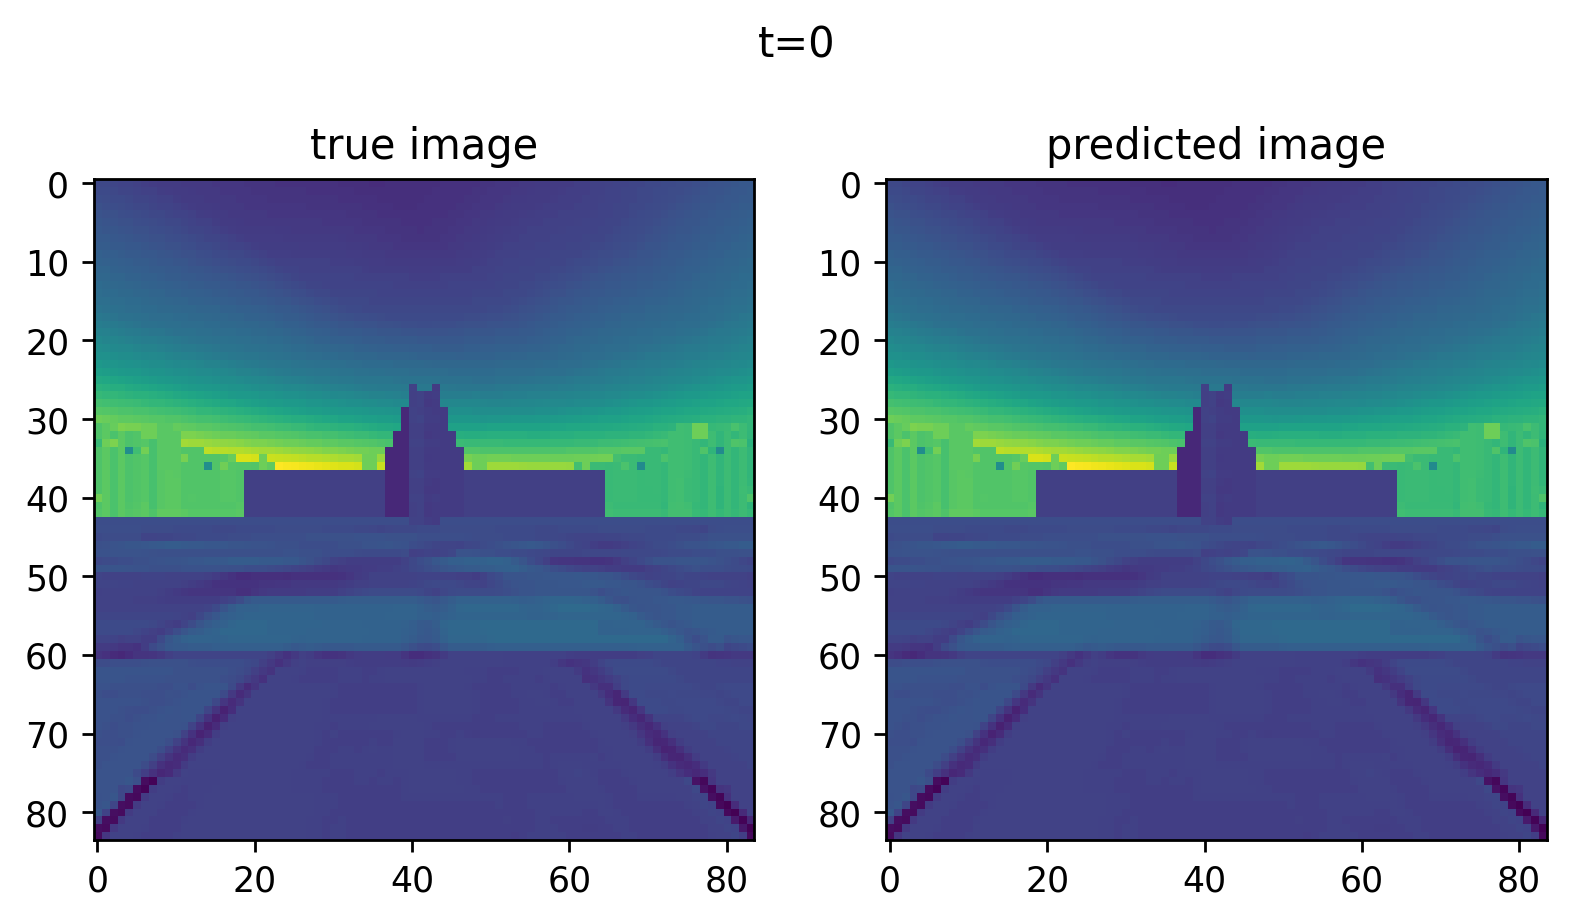

In [8]:
ani = agent.history.make_image_video()

In [9]:
ani.save("diff_certainties.gif", progress_callback=lambda current, total: print(f"frame {current}/{total}"), dpi=150)

MovieWriter ffmpeg unavailable; using Pillow instead.


frame 0/100
frame 1/100
frame 2/100
frame 3/100
frame 4/100
frame 5/100
frame 6/100
frame 7/100
frame 8/100
frame 9/100
frame 10/100
frame 11/100
frame 12/100
frame 13/100
frame 14/100
frame 15/100
frame 16/100
frame 17/100
frame 18/100
frame 19/100
frame 20/100
frame 21/100
frame 22/100
frame 23/100
frame 24/100
frame 25/100
frame 26/100
frame 27/100
frame 28/100
frame 29/100
frame 30/100
frame 31/100
frame 32/100
frame 33/100
frame 34/100
frame 35/100
frame 36/100
frame 37/100
frame 38/100
frame 39/100
frame 40/100
frame 41/100
frame 42/100
frame 43/100
frame 44/100
frame 45/100
frame 46/100
frame 47/100
frame 48/100
frame 49/100
frame 50/100
frame 51/100
frame 52/100
frame 53/100
frame 54/100
frame 55/100
frame 56/100
frame 57/100
frame 58/100
frame 59/100
frame 60/100
frame 61/100
frame 62/100
frame 63/100
frame 64/100
frame 65/100
frame 66/100
frame 67/100
frame 68/100
frame 69/100
frame 70/100
frame 71/100
frame 72/100
frame 73/100
frame 74/100
frame 75/100
frame 76/100
frame 77/

In [10]:
agent.history._estimated_images

[tensor([[0.4792, 0.4783, 0.4752,  ..., 0.5016, 0.5055, 0.5066],
         [0.4834, 0.4822, 0.4792,  ..., 0.5055, 0.5066, 0.5094],
         [0.4873, 0.4862, 0.4834,  ..., 0.5066, 0.5094, 0.5105],
         ...,
         [0.4681, 0.3956, 0.3928,  ..., 0.4121, 0.3833, 0.4303],
         [0.3956, 0.3928, 0.4550,  ..., 0.4712, 0.4082, 0.3824],
         [0.3928, 0.4522, 0.4709,  ..., 0.4748, 0.4645, 0.3903]]),
 tensor([[0.4336, 0.4329, 0.4301,  ..., 0.4539, 0.4575, 0.4585],
         [0.4374, 0.4364, 0.4336,  ..., 0.4575, 0.4585, 0.4610],
         [0.4410, 0.4400, 0.4374,  ..., 0.4585, 0.4610, 0.4620],
         ...,
         [0.4111, 0.3604, 0.3679,  ..., 0.3844, 0.3533, 0.3822],
         [0.3604, 0.3679, 0.4143,  ..., 0.4269, 0.3815, 0.3509],
         [0.3679, 0.4122, 0.4262,  ..., 0.4291, 0.4219, 0.3682]]),
 tensor([[0.4348, 0.4341, 0.4313,  ..., 0.4552, 0.4587, 0.4597],
         [0.4386, 0.4376, 0.4348,  ..., 0.4587, 0.4597, 0.4623],
         [0.4422, 0.4412, 0.4386,  ..., 0.4597, 0.4623, 0.

In [ ]:
env.close()